# **Decision Trees**

Decision trees are supervised learning models that recursively partition data based on feature values, forming a tree-like structure with root, internal, and leaf nodes.

They use metrics like information gain, entropy, or Gini impurity to determine optimal splits, and employ pruning techniques to prevent overfitting, making them versatile for both classification and regression tasks by visualizing decision-making processes.

When building decision trees, "information gain," "entropy," and "Gini impurity" are crucial metrics that help determine the best way to split the data at each node. Here's a concise explanation:

**Entropy:**

This measures the level of disorder or uncertainty within a dataset.

In the context of decision trees, it quantifies how mixed the classes are within a particular node.
A high entropy value indicates a high degree of impurity, while a low entropy value indicates that the node is relatively pure (i.e., most data points belong to the same class).


**Gini Impurity:**

Similar to entropy, Gini impurity measures the impurity of a dataset.

It represents the probability of incorrectly classifying a randomly chosen element in the dataset.
Like entropy, lower Gini impurity values indicate higher purity.


**Information Gain:**

This measures the reduction in entropy (or the decrease in impurity) that results from splitting a dataset based on a particular attribute.

Decision tree algorithms use information gain to select the attribute that provides the most significant reduction in entropy, effectively choosing the best split.

Essentially, it is the difference between the entropy of the parent node and the weighted entropy of the child nodes.

In simpler terms:

Entropy and Gini impurity tell us how "mixed up" the data is.

Information gain tells us how much better we can separate the data by splitting it a certain way.

These metrics are fundamental to how decision trees make decisions, enabling them to create effective classification and regression models.

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [171]:
df=pd.read_csv("/content/drive/MyDrive/datasets/ml/cricket1.csv")
df

,Outlook,Temperature,Humidity,Windy,Play Cricket
0,Sunny,Hot,High,False,No
1,Sunny,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Rainy,Mild,High,False,Yes
4,Rainy,Cool,Normal,False,Yes
5,Rainy,Cool,Normal,True,No
6,Overcast,Cool,Normal,True,Yes
7,Sunny,Mild,High,False,No
8,Sunny,Cool,Normal,False,Yes
9,Rainy,Mild,Normal,False,Yes


In [172]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [173]:
df.columns

Index(['Outlook', 'Temperature', 'Humidity', 'Windy', 'Play Cricket'], dtype='object')

In [174]:
for i in df.columns:
  if df[i].dtype!=int:
    print(i)
    df[f"{i}_enc"]=le.fit_transform(df[i])

Outlook
Temperature
Humidity
Windy
Play Cricket


In [175]:
df

,Outlook,Temperature,Humidity,Windy,Play Cricket,Outlook_enc,Temperature_enc,Humidity_enc,Windy_enc,Play Cricket_enc
0,Sunny,Hot,High,False,No,2,1,0,0,0
1,Sunny,Hot,High,True,No,2,1,0,1,0
2,Overcast,Hot,High,False,Yes,0,1,0,0,1
3,Rainy,Mild,High,False,Yes,1,2,0,0,1
4,Rainy,Cool,Normal,False,Yes,1,0,1,0,1
5,Rainy,Cool,Normal,True,No,1,0,1,1,0
6,Overcast,Cool,Normal,True,Yes,0,0,1,1,1
7,Sunny,Mild,High,False,No,2,2,0,0,0
8,Sunny,Cool,Normal,False,Yes,2,0,1,0,1
9,Rainy,Mild,Normal,False,Yes,1,2,1,0,1


In [176]:
for i in df.columns:
  if df[i].dtype!=int:
    df.drop(i,axis=1,inplace=True)

In [177]:
df

,Outlook_enc,Temperature_enc,Humidity_enc,Windy_enc,Play Cricket_enc
0,2,1,0,0,0
1,2,1,0,1,0
2,0,1,0,0,1
3,1,2,0,0,1
4,1,0,1,0,1
5,1,0,1,1,0
6,0,0,1,1,1
7,2,2,0,0,0
8,2,0,1,0,1
9,1,2,1,0,1


In [178]:
x=df.drop('Play Cricket_enc',axis=1)
y=df['Play Cricket_enc']

In [179]:
x.shape

(14, 4)

In [180]:
y.shape

(14,)

In [181]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [182]:
xtrain.shape

(11, 4)

In [183]:
xtest.shape

(3, 4)

In [184]:
ytrain.shape

(11,)

In [185]:
ytest.shape

(3,)

In [186]:
from sklearn.tree import DecisionTreeClassifier
dtg=DecisionTreeClassifier(criterion="gini")
dtg.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [187]:
dte=DecisionTreeClassifier(criterion="entropy")
dte.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy')

In [188]:
dtg.score(xtrain,ytrain)

1.0

In [189]:
dte.score(xtrain,ytrain)

1.0

In [190]:
pred_e=dte.predict(xtest)
pred_g=dtg.predict(xtest)

In [191]:
pred_e

array([0, 0, 1])

In [192]:
pred_g

array([0, 0, 1])

In [193]:
dte.predict([[2,1,1,1]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [194]:
df['pred_g']=dtg.predict(x)
df['pred_e']=dte.predict(x)

In [195]:
df

,Outlook_enc,Temperature_enc,Humidity_enc,Windy_enc,Play Cricket_enc,pred_g,pred_e
0,2,1,0,0,0,0,0
1,2,1,0,1,0,0,0
2,0,1,0,0,1,1,1
3,1,2,0,0,1,0,0
4,1,0,1,0,1,1,1
5,1,0,1,1,0,0,0
6,0,0,1,1,1,1,1
7,2,2,0,0,0,0,0
8,2,0,1,0,1,1,1
9,1,2,1,0,1,1,1


In [196]:
df['equal_g']= df['Play Cricket_enc']==df['pred_g']
df['equal_e']= df['Play Cricket_enc']==df['pred_e']

In [197]:
df.equal_g.value_counts()

,count
equal_g,
True,13
False,1


In [198]:
df.equal_e.value_counts()

,count
equal_e,
True,13
False,1


In [199]:
df[df['equal_g']==False]

,Outlook_enc,Temperature_enc,Humidity_enc,Windy_enc,Play Cricket_enc,pred_g,pred_e,equal_g,equal_e
3,1,2,0,0,1,0,0,False,False


In [200]:
df[df['equal_e']==False]

,Outlook_enc,Temperature_enc,Humidity_enc,Windy_enc,Play Cricket_enc,pred_g,pred_e,equal_g,equal_e
3,1,2,0,0,1,0,0,False,False


In [201]:
dtg.predict([[2,1,0,0]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [202]:
dte.predict([[2,1,0,0]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

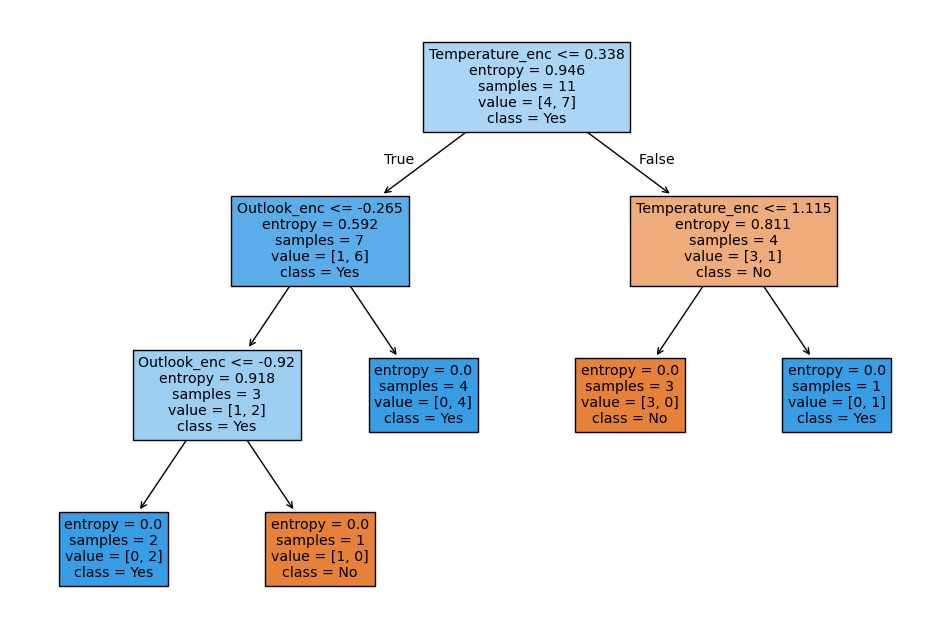

In [213]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12, 8))
plot_tree(dte, feature_names=x.columns, class_names=["No", "Yes"], filled=True)
plt.show()


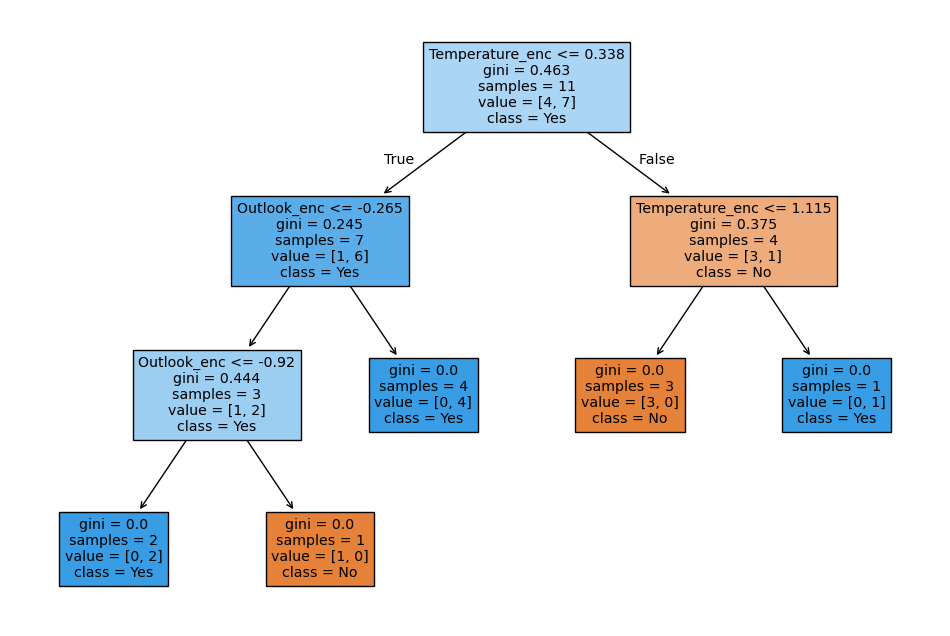

In [212]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12, 8))
plot_tree(dtg, feature_names=x.columns, class_names=["No", "Yes"], filled=True)
plt.show()


In [205]:
x.shape

(14, 4)

In [206]:
xtrain.shape

(11, 4)

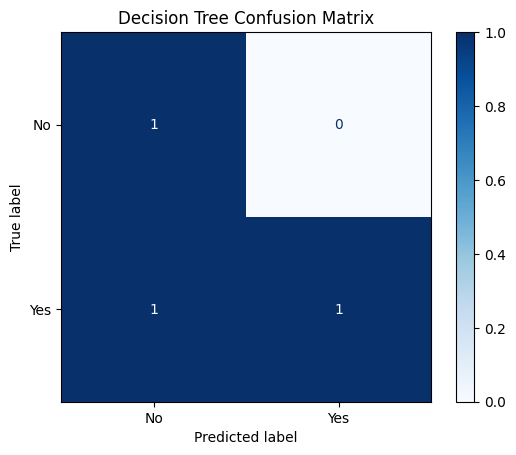

In [207]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get predictions
y_pred_e = dte.predict(xtest)

# Generate Confusion Matrix
cm = confusion_matrix(ytest, y_pred_e)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No", "Yes"])

# Show the confusion matrix
disp.plot(cmap="Blues")
plt.title("Decision Tree Confusion Matrix")
plt.show()


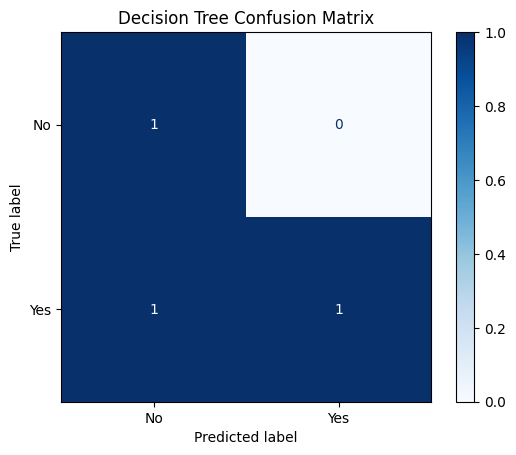

In [208]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get predictions
y_pred_g = dte.predict(xtest)

# Generate Confusion Matrix
cm = confusion_matrix(ytest, y_pred_g)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No", "Yes"])

# Show the confusion matrix
disp.plot(cmap="Blues")
plt.title("Decision Tree Confusion Matrix")
plt.show()


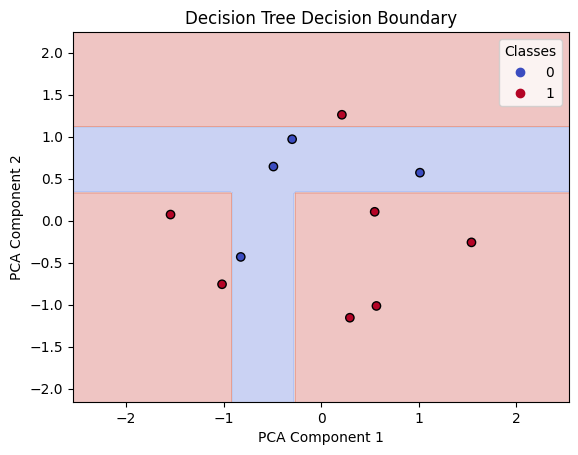

In [209]:
from sklearn.decomposition import PCA

# Reduce features to 2D for visualization
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(xtrain)
x_test_pca = pca.transform(xtest)

# Train Decision Tree on PCA-transformed data
dte.fit(x_train_pca, ytrain)

# Plot decision boundaries
def plot_decision_boundary(model, X, y):
    h = 0.02  # Step size in the mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors="k")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.title("Decision Tree Decision Boundary")
    plt.legend(*scatter.legend_elements(), title="Classes")
    plt.show()

plot_decision_boundary(dte, x_train_pca, ytrain)


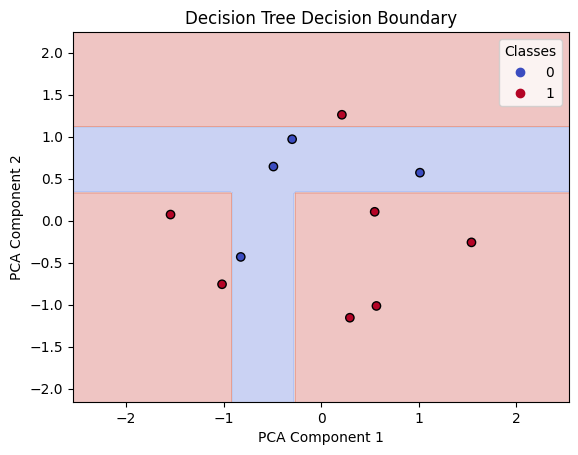

In [210]:
from sklearn.decomposition import PCA

# Reduce features to 2D for visualization
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(xtrain)
x_test_pca = pca.transform(xtest)

# Train Decision Tree on PCA-transformed data
dtg.fit(x_train_pca, ytrain)

# Plot decision boundaries
def plot_decision_boundary(model, X, y):
    h = 0.02  # Step size in the mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors="k")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.title("Decision Tree Decision Boundary")
    plt.legend(*scatter.legend_elements(), title="Classes")
    plt.show()

plot_decision_boundary(dtg, x_train_pca, ytrain)
